In [1]:
from astropy.io import fits
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fits_path = 'Image_fits/'
dat_path = 'C:/Users/Toby\Documents/University/JRA/Quasar Searching/five_and_half_arcmin_match.dat'
matches_table = Table.read(dat_path, format='ascii')
# matches_table

In [3]:
def add_marker(wcs, ra, dec, is_target=False, label='None'):
    x,y = wcs.world_to_pixel(SkyCoord(ra,dec, unit='deg'))
    
    if is_target:
        plt.scatter(x,y, c="None", edgecolors="white", s=200, alpha=0.5, label=label)
    else:
        plt.scatter(x,y, c="None", edgecolors="red", s=100, alpha=0.5, label=label)
    return

In [4]:

def mark_image(cluster_id, matches_table=matches_table, make_save=False):
    cluster = matches_table[matches_table['clus_ID_SRC']==cluster_id]

    image, header = fits.getdata(fits_path+"image_"+str(cluster_id)+".fits", header=True)

    w = WCS(header)

    plt.figure(dpi=300)

    plt.imshow(image, origin='lower')

    add_marker(w,cluster['clus_RA'][0], cluster['clust_DEC'][0], is_target=True, label="eFEDS "+str(cluster["clus_ID_SRC"][0]))

    for source in cluster:
        add_marker(w,source['ra'], source['dec'], label="source_id "+str(source["source_id"]))
    
    if make_save:
        plt.savefig("Images/eFEDS_"+str(cluster_id)+"_with_markers.png")
    plt.show()


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
Set MJD-OBS to 58790.113021 from DATE-OBS.
Set MJD-END to 58793.277789 from DATE-END'. [astropy.wcs.wcs]


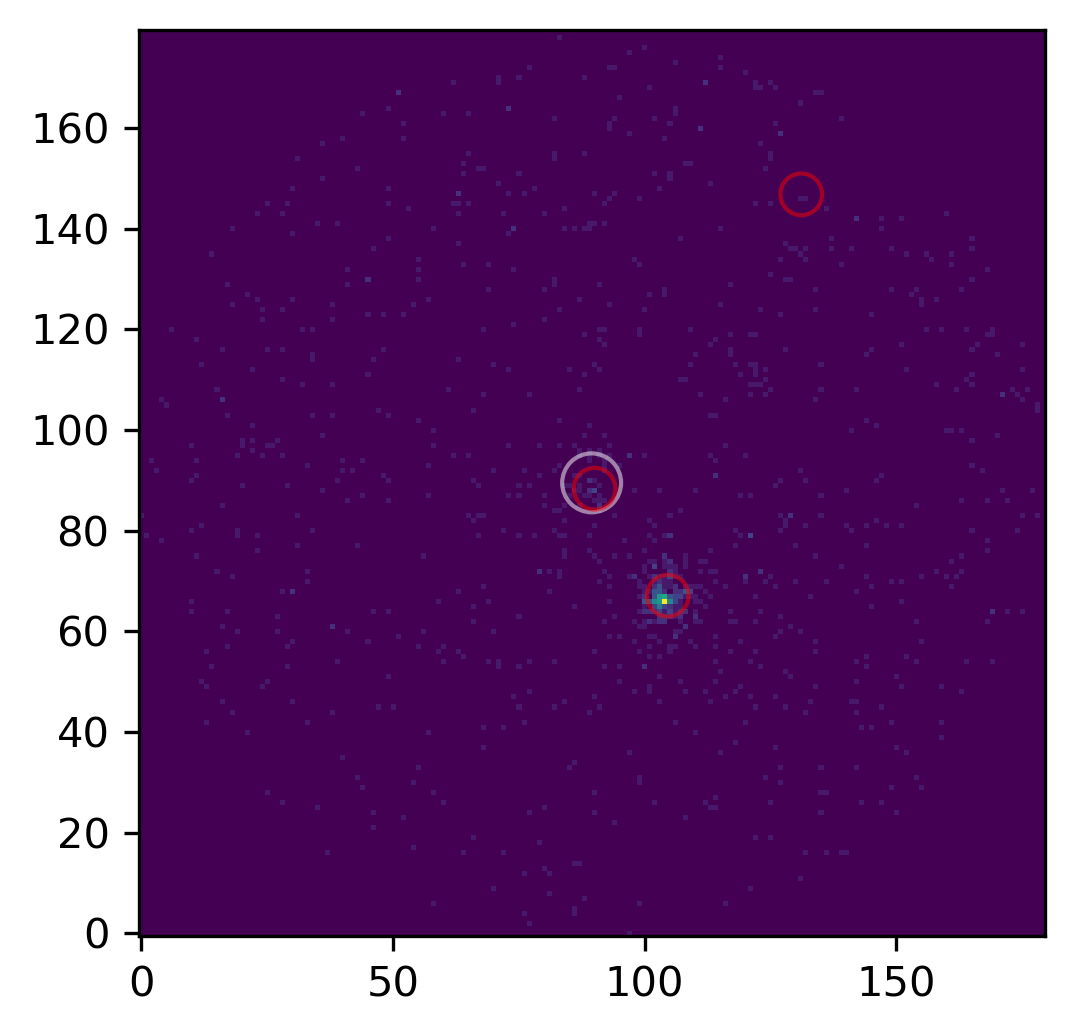

In [5]:
mark_image(4430, make_save=True)

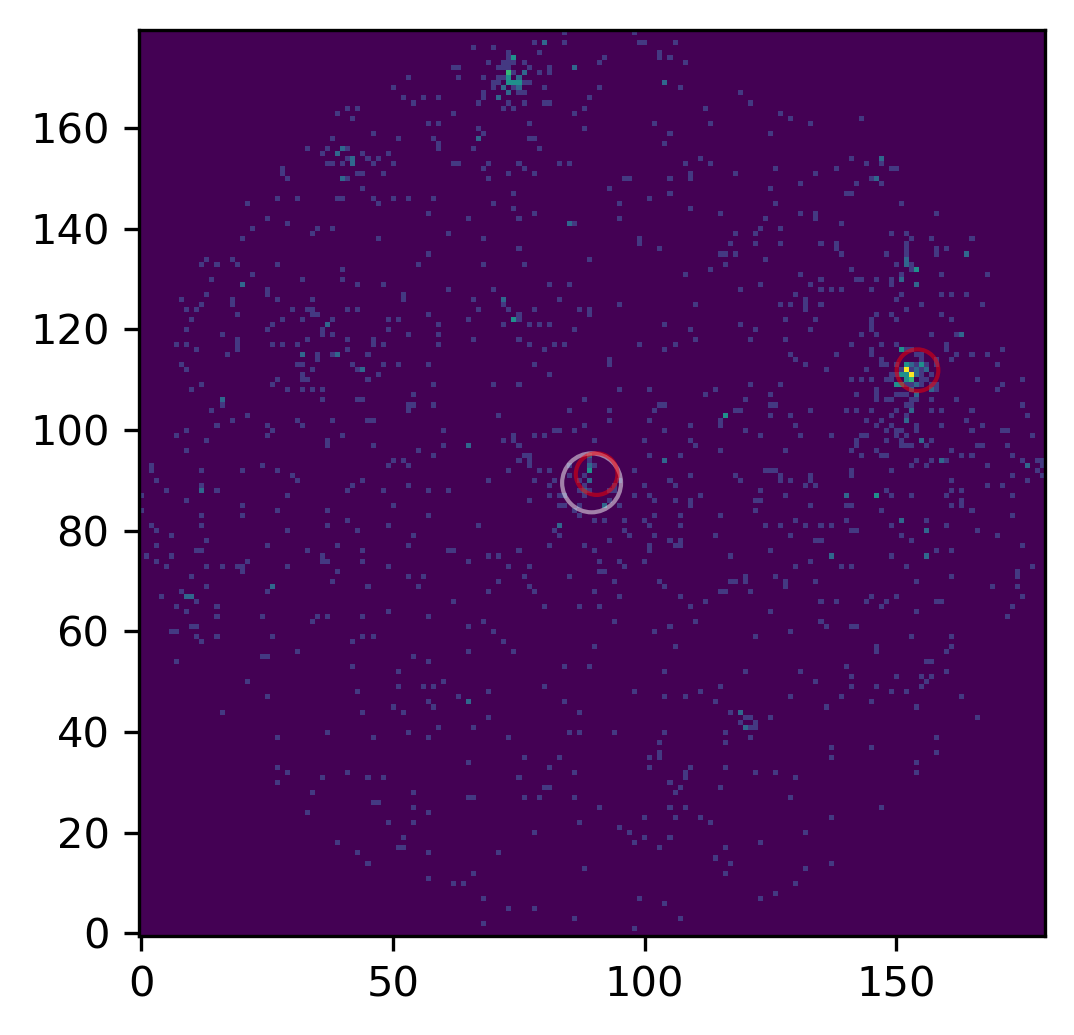

In [6]:
mark_image(5591)

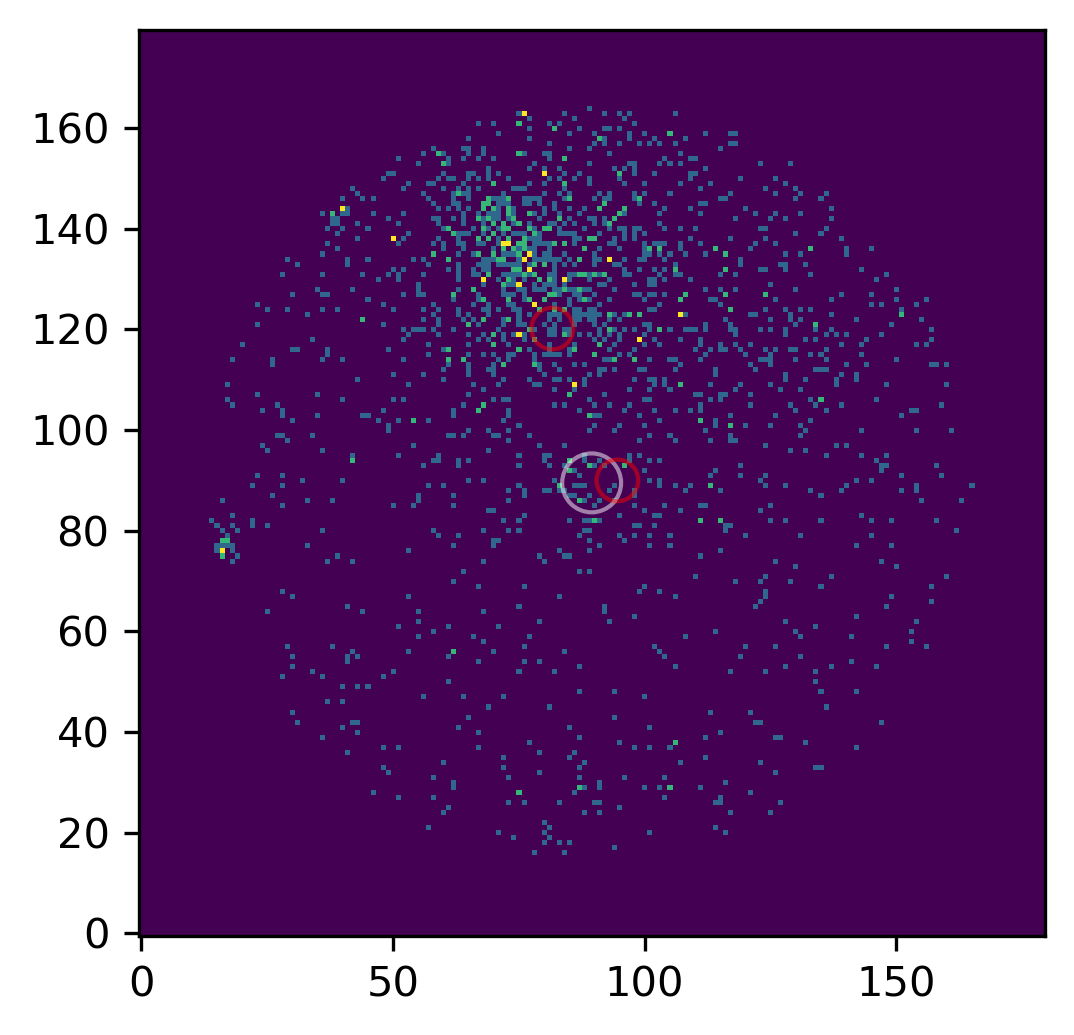

In [7]:
mark_image(6979)

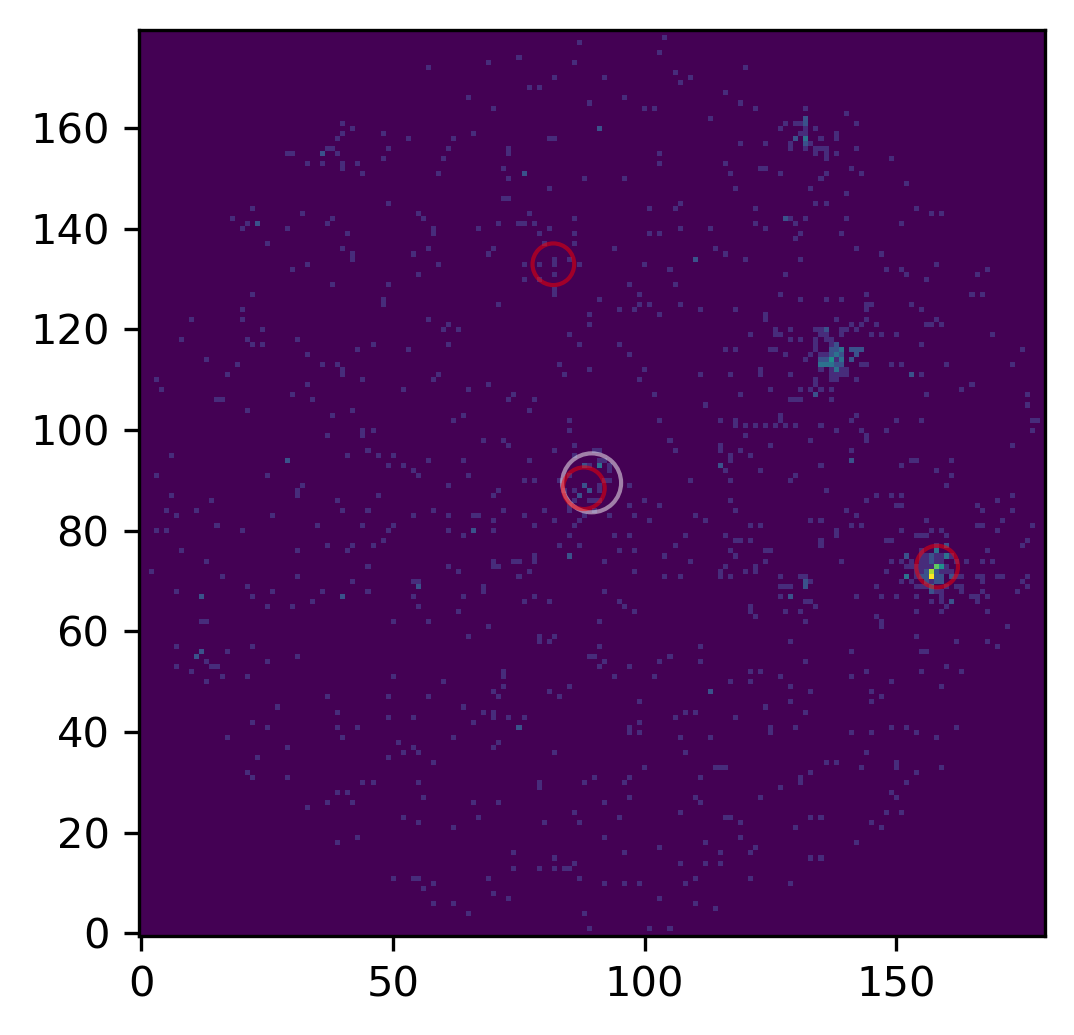

In [8]:
mark_image(6988)

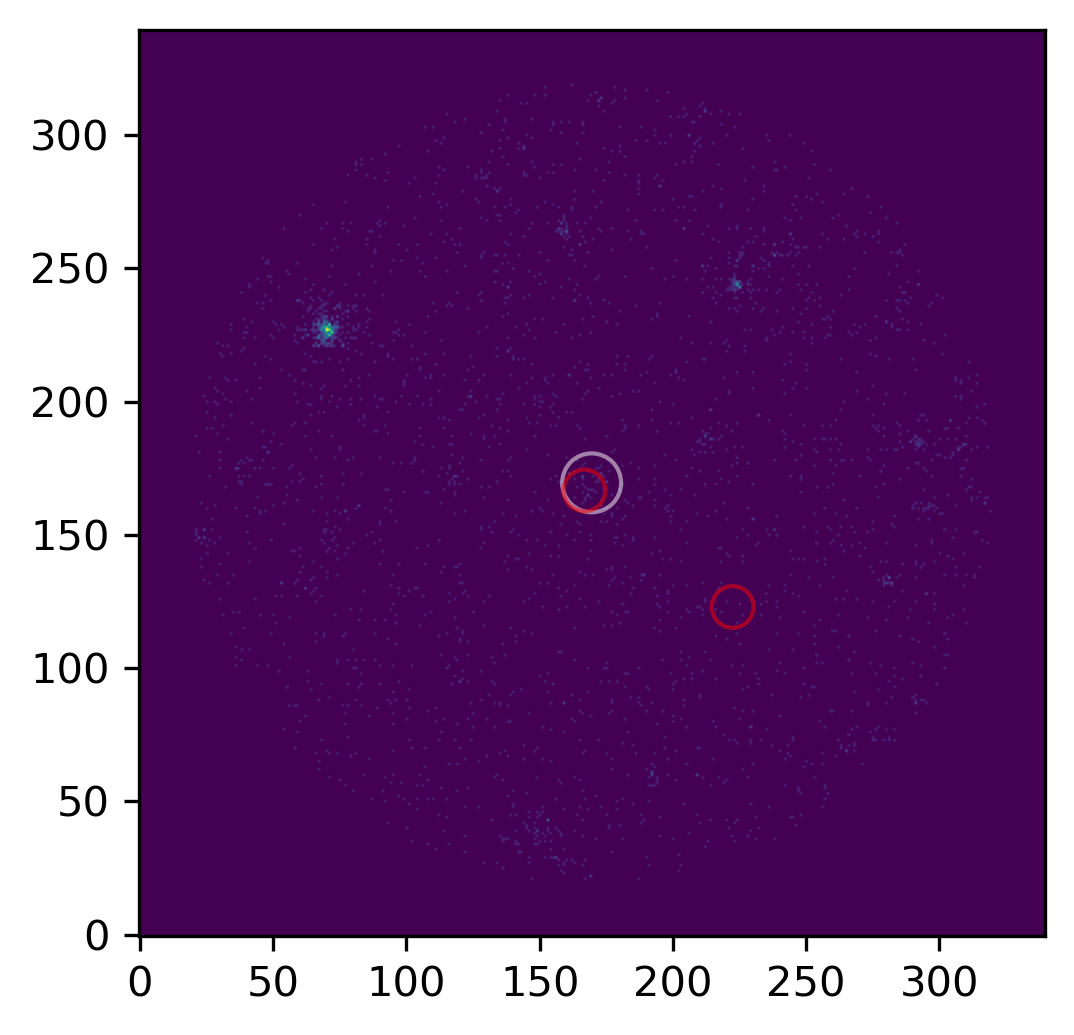

In [9]:
mark_image(5544)

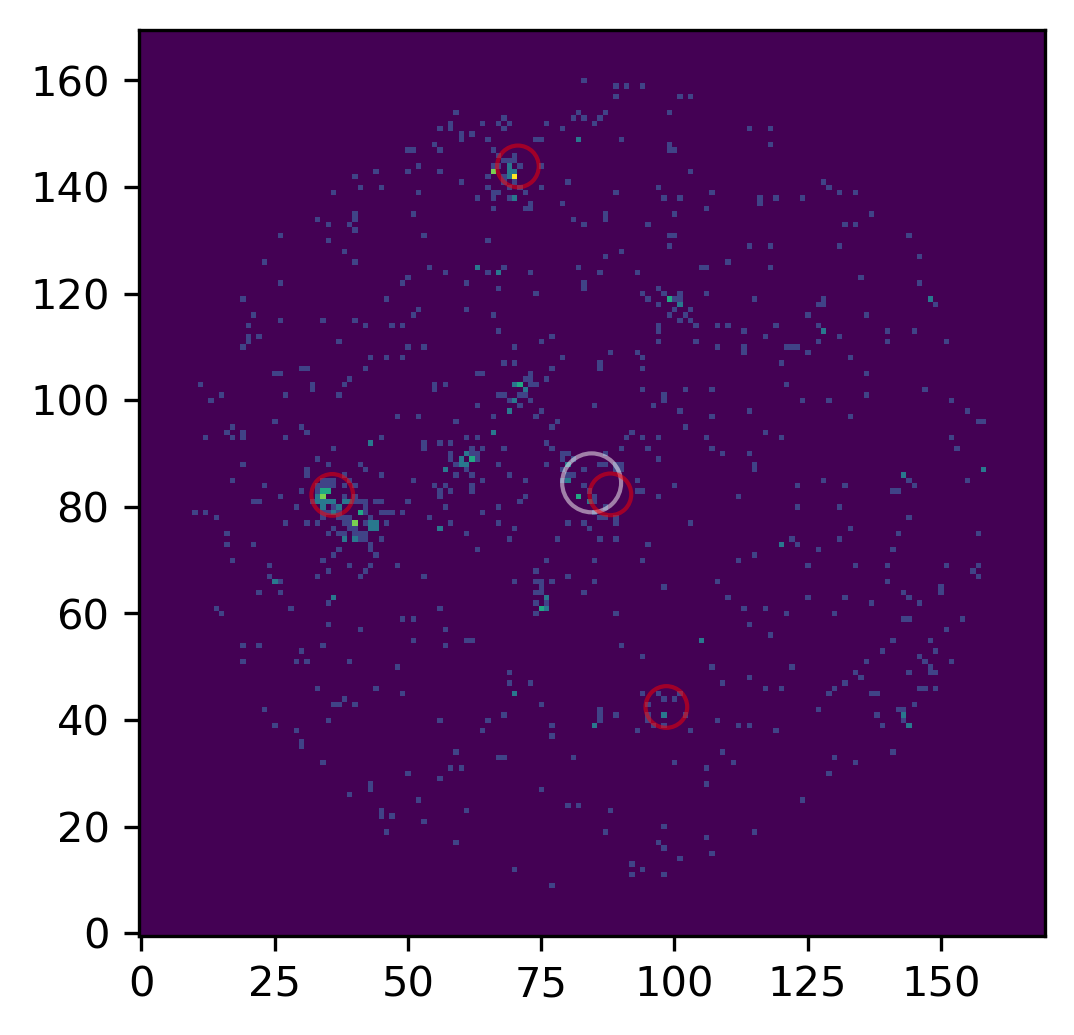

In [10]:
mark_image(7213)

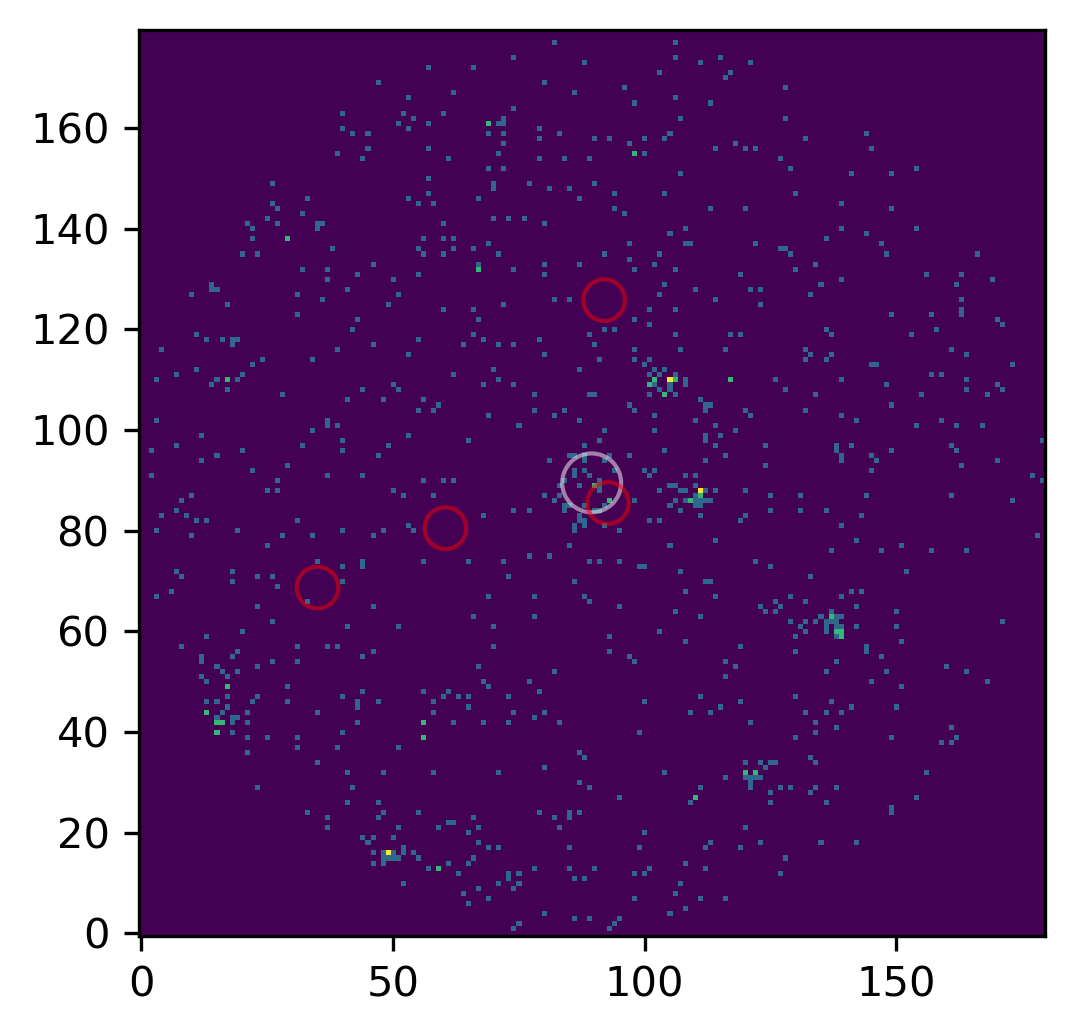

In [11]:
mark_image(6903)

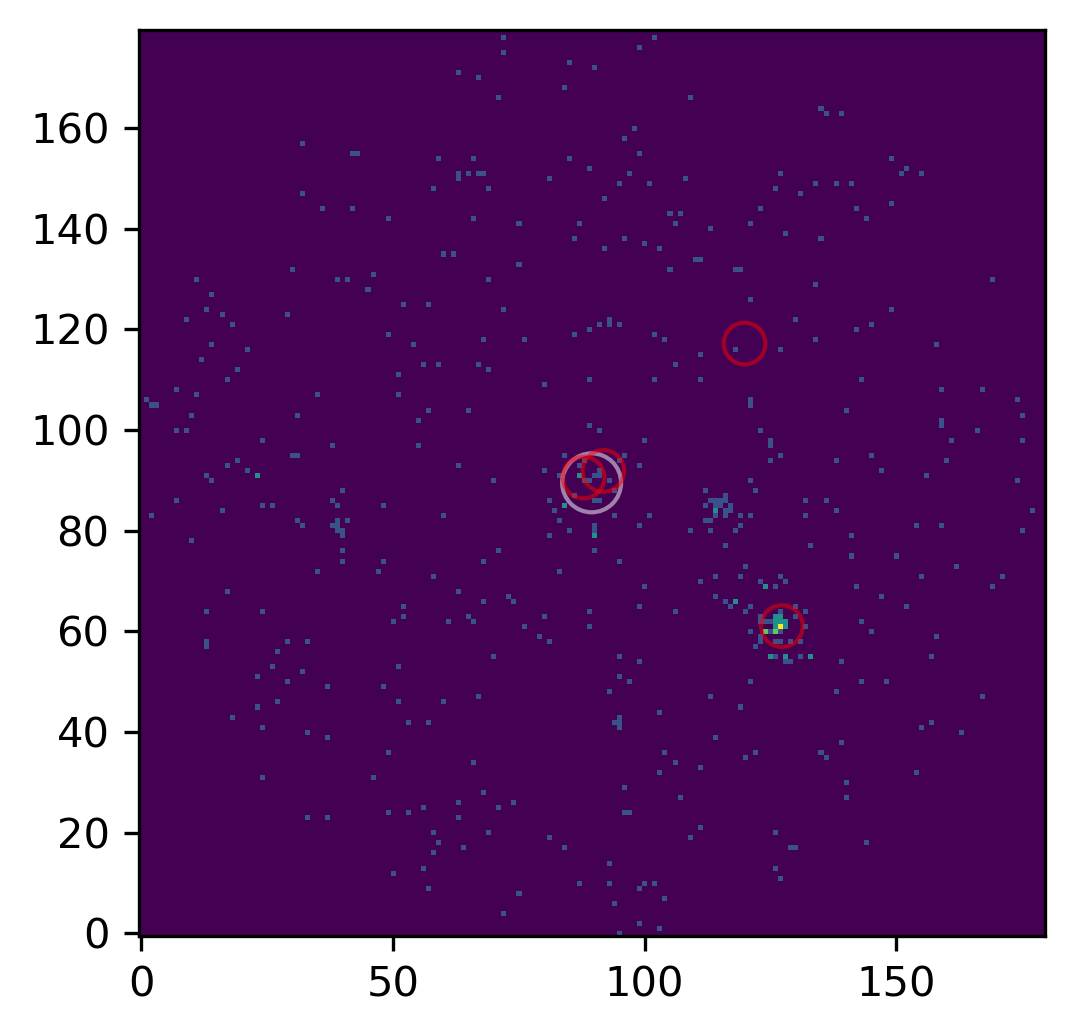

In [12]:
mark_image(6642)